# I. Lý thuyết

1) Mạng tích chập CNN sẽ được thực hiện như thế nào?

A. Phân chia feature map thành các ma trận theo chiều channel và thực hiện tích chập giữa mỗi ma trận kernel với từng chiều.

B. Thực hiện phép nhân ma trận kernel với chuyển vị của ma trận local receptive field để thu được giá trị feature map output.

C. Tính trung bình các phân tử trên một ma trận local receptive field.

D. Di chuyển vùng local receptive field theo chiều từ trái sang phải và từ trên xuống dưới và nhân tích chập với kernel để thu được ma trận feature map.

***Đáp án: D.***

2) Thực hiện phép nhân tích chập giữa ma trận đầu vào kích thước width và height lần lượt là $(W, H)$ với bộ lọc kích thước $(F, F)$ và bước nhảy $S$ thì thu được ma trận đầu ra với kích thước width và height $(W', H')$ là bao nhiêu? Hãy lựa chọn công thức tổng quát nhất.

A. $W' =⌊ \frac{W-F}{S} ⌋ + 1;~ H' =⌊ \frac{H-F}{S} ⌋ + 1$

B. $W' =\lceil \frac{W-F}{S} \rceil + 1;~ H' = \lceil \frac{H-F}{S} \rceil + 1$ 

C. $W' =\lfloor \frac{W-F+2P}{S} \rfloor + 1;~ H' = \lfloor \frac{H-F+2P}{S} \rfloor + 1$ với $P$ là số lượng các véc tơ 0 padding ở bên ngoài đều hai phía.

D. $W' =\lceil \frac{W-F+P}{S} \rceil + 1;~ H' = \lceil \frac{H-F+P}{S} \rceil + 1$ với $P$ là số lượng các véc tơ 0 padding ở bên ngoài đều hai phía.

***Đáp án: C.***

3) Mạng CNN sẽ học được những gì qua các layers?

A. Tại những layers đầu mỗi channels sẽ giúp phân biệt một loại đặc trưng, của vật thể. Những đặc trưng này sau đó được trải phẳng và đưa vào mạng MLP để phân loại vật thể.

B. Những layers cuối cùng sẽ zoom vào từng chi tiết của vật thể để phân loại vật thể.

C. Tại những layers đầu mạng sẽ học được các đặc trưng chung như các edge dọc, ngang, chéo,.... Các đặc trưng chi tiết và tổng quát giúp nhận diện vật thể được học tại những layers cuối cùng.

D. Các layers đầu tiên sẽ tập trung vào các chi tiết bộ phận của vật thể.

***Đáp án: C.***

4) Kiến trúc chung của một mạng CNN là gì?

A. _[Conv -> BatchNorm -> Activation -> Maxpooling] x n_

B. _[BatchNorm -> Conv -> Activation -> Maxpooling] x n_ 

C. _[Conv -> BatchNorm -> Maxpooling -> Activation -> Maxpooling] x n_ 

D. _[Conv -> BatchNorm -> Maxpooling -> Activation -> Maxpooling] x n -> Flatten -> [FullyConnected -> Activation] x m -> Softmax_ 

***Đáp án: D.***

5) Thông thường đặc điểm kích thước feature map của mạng neural sẽ như thế nào ?

A. Kích thước feature map tăng dần gấp đôi qua thời gian.

B. Kích thước feature map sẽ duy trì không đổi qua thời gian.

C. Kích thước mạng sẽ giảm dần gấp đôi sau mỗi một lần downsampling và sau đó tăng dần gấp đôi sau mỗi lần upsampling để khôi phục về kích thước ảnh input.

D. Kích thước mạng thường giảm gấp đôi sau một lần downsampling và số lượng các filters tăng dần.

***Đáp án: D.***

# II. Thực hành

6) Thực hiện xây dựng và huấn luyện một mạng CNN ngẫu nhiên trên bộ dữ liệu [Dog and Cat](https://www.kaggle.com/c/dog-vs-cat-classification/data). Lưu ý cần thực hiện [chuẩn hóa dữ liệu](https://github.com/pytorch/examples/issues/112) đối với bộ dữ liệu ImageNet trước khi huấn luyện.

7) Grid Search kiến trúc CNN dựa trên việc tổng quát hóa một thiết kế câu 6.

8) Huấn luyện lại mô hình bằng kiến trúc ResNet và MobileNet. Đánh giá chi phí tính toán và submit kết quả độ chính xác trên các ảnh thuộc folder test.

9) Thử nghiệm các phương pháp Augmentation như Flip, Rotation, Random Crop, Bright Contrast để cải thiện kết quả mô hình.

10) Lập bảng kết quả các thử nghiệm đã sử dụng.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/MyDrive/Colab Notebooks/TowardDataScience/lesson5")

In [ ]:
!unzip dog-vs-cat-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/dogs/dog.5499.jpg  
  inflating: train/train/dogs/dog.55.jpg  
  inflating: train/train/dogs/dog.550.jpg  
  inflating: train/train/dogs/dog.5500.jpg  
  inflating: train/train/dogs/dog.5501.jpg  
  inflating: train/train/dogs/dog.5502.jpg  
  inflating: train/train/dogs/dog.5503.jpg  
  inflating: train/train/dogs/dog.5504.jpg  
  inflating: train/train/dogs/dog.5505.jpg  
  inflating: train/train/dogs/dog.5506.jpg  
  inflating: train/train/dogs/dog.5507.jpg  
  inflating: train/train/dogs/dog.5508.jpg  
  inflating: train/train/dogs/dog.5509.jpg  
  inflating: train/train/dogs/dog.551.jpg  
  inflating: train/train/dogs/dog.5510.jpg  
  inflating: train/train/dogs/dog.5511.jpg  
  inflating: train/train/dogs/dog.5512.jpg  
  inflating: train/train/dogs/dog.5513.jpg  
  inflating: train/train/dogs/dog.5514.jpg  
  inflating: train/train/dogs/dog.5515.jpg  
  inflating: train/train/dogs/dog.5516.jpg  
  inflat

In [ ]:
!ls

5.CNN_HomeWork_LeMinhHieu.ipynb  sample_submission.csv	train
dog-vs-cat-classification.zip	 test


In [ ]:
import os
import shutil
import numpy as np

cat_data = 'train/train/cats/'
dog_data = 'train/train/dogs/'

lst_files = os.listdir(cat_data)
for index, file in enumerate(lst_files):
    if index == 2500: break
    shutil.move(cat_data + file, "train/val/cats/" + file)


lst_files = os.listdir(dog_data)
for index, file in enumerate(lst_files):
    if index == 2500: break
    shutil.move(dog_data + file, "train/val/dogs/" + file)
   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory='train/train/',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32)

test_generator = test_datagen.flow_from_directory(
    directory='train/val/',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 3 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)
# opt = 'adam'
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_generator, validation_data=test_generator, epochs=10)

Epoch 1/10
625/625 [==============================] - 2868s 5s/step - loss: 0.6311 - accuracy: 0.6464 - val_loss: 1.0670 - val_accuracy: 0.0590
Epoch 2/10
625/625 [==============================] - 161s 257ms/step - loss: 0.5392 - accuracy: 0.7258 - val_loss: 1.5658 - val_accuracy: 0.0226
Epoch 3/10
625/625 [==============================] - 155s 249ms/step - loss: 0.4821 - accuracy: 0.7673 - val_loss: 0.0715 - val_accuracy: 0.1332
Epoch 4/10
625/625 [==============================] - 145s 231ms/step - loss: 0.4394 - accuracy: 0.7991 - val_loss: 0.5430 - val_accuracy: 0.0842
Epoch 5/10
625/625 [==============================] - 145s 231ms/step - loss: 0.4044 - accuracy: 0.8144 - val_loss: 0.6737 - val_accuracy: 0.0678
Epoch 6/10
625/625 [==============================] - 146s 233ms/step - loss: 0.3679 - accuracy: 0.8354 - val_loss: 0.5715 - val_accuracy: 0.0706
Epoch 7/10
625/625 [==============================] - 154s 246ms/step - loss: 0.3217 - accuracy: 0.8600 - val_loss: -0.5665 - 

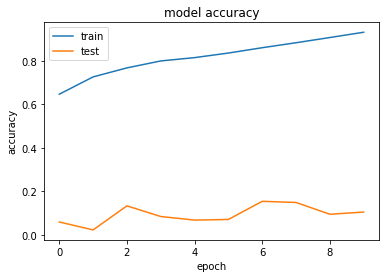

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

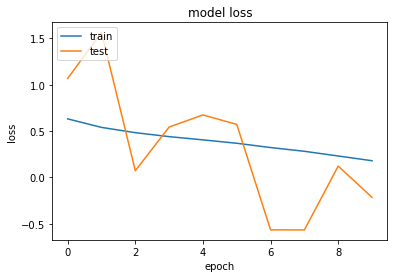

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Save the trained model
modelFileName = 'models/image_classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/image_classifier.h5


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
model_handle = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
feature_extractor = hub.KerasLayer(
    handle=model_handle,
    trainable=False,
    input_shape = (224, 224, 3),
    output_shape = [2048]
)

resnet = tf.keras.models.Sequential([
    feature_extractor,
    Dense(1, activation='sigmoid')
])

resnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 dense_2 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,566,849
Trainable params: 2,049
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
resnet.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy']) 

In [ ]:
resnet.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
625/625 [==============================] - 183s 279ms/step - loss: 0.0521 - accuracy: 0.9823 - val_loss: -0.0264 - val_accuracy: 0.0096
Epoch 2/10
625/625 [==============================] - 161s 257ms/step - loss: 0.0288 - accuracy: 0.9895 - val_loss: 1.9064 - val_accuracy: 0.0024
Epoch 3/10
625/625 [==============================] - 171s 274ms/step - loss: 0.0231 - accuracy: 0.9916 - val_loss: 0.1119 - val_accuracy: 0.0100
Epoch 4/10
625/625 [==============================] - 176s 281ms/step - loss: 0.0197 - accuracy: 0.9926 - val_loss: 0.4717 - val_accuracy: 0.0076
Epoch 5/10
625/625 [==============================] - 166s 266ms/step - loss: 0.0179 - accuracy: 0.9940 - val_loss: 0.6546 - val_accuracy: 0.0082
Epoch 6/10
625/625 [==============================] - 163s 261ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 1.1274 - val_accuracy: 0.0072
Epoch 7/10
625/625 [==============================] - 164s 263ms/step - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.8529 